## Fraud Detection Using KNN
### Proyek Akhir Data Mining
### Kelompok 3

#### Pendahuluan: Import libraries and Load data

In [1]:
import pandas as pd
import numpy as np

In [2]:
file = ("fraud_detection_train.csv")
df = pd.read_csv(file)

Load data set fraud_detection_train menggunakan fungsi read_csv() yang terdapat pada library pandas.

## I. Data Understanding

### a. Describe data

In [3]:
df.shape

(200217, 53)

Dataset yang digunakan terdiri dari 200217 record dengan 53 kolom. 

In [4]:
print(df.columns)

Index(['visit_id', 'kdkc', 'dati2', 'typeppk', 'jkpst', 'umur', 'jnspelsep',
       'los', 'cmg', 'severitylevel', 'diagprimer', 'dx2_a00_b99',
       'dx2_c00_d48', 'dx2_d50_d89', 'dx2_e00_e90', 'dx2_f00_f99',
       'dx2_g00_g99', 'dx2_h00_h59', 'dx2_h60_h95', 'dx2_i00_i99',
       'dx2_j00_j99', 'dx2_koo_k93', 'dx2_l00_l99', 'dx2_m00_m99',
       'dx2_n00_n99', 'dx2_o00_o99', 'dx2_p00_p96', 'dx2_q00_q99',
       'dx2_r00_r99', 'dx2_s00_t98', 'dx2_u00_u99', 'dx2_v01_y98',
       'dx2_z00_z99', 'proc00_13', 'proc14_23', 'proc24_27', 'proc28_28',
       'proc29_31', 'proc_32_38', 'proc39_45', 'proc46_51', 'proc52_57',
       'proc58_62', 'proc63_67', 'proc68_70', 'proc71_73', 'proc74_75',
       'proc76_77', 'proc78_79', 'proc80_99', 'proce00_e99', 'procv00_v89',
       'label'],
      dtype='object')


In [5]:
df.head()

,visit_id,kdkc,dati2,typeppk,jkpst,umur,jnspelsep,los,cmg,severitylevel,...,proc63_67,proc68_70,proc71_73,proc74_75,proc76_77,proc78_79,proc80_99,proce00_e99,procv00_v89,label
0,1,1107,150,SB,P,64,2,0,F,0,...,0,0,0,0,0,0,0,0,0,1
1,2,1303,200,C,L,45,1,9,E,3,...,0,0,0,0,0,0,4,0,0,1
2,3,1114,172,B,P,34,2,0,Q,0,...,0,0,0,0,0,0,0,0,0,1
3,4,601,90,SC,L,34,2,0,Q,0,...,0,0,0,0,0,0,0,0,0,1
4,5,1006,130,B,L,27,2,0,F,0,...,0,0,0,0,0,0,0,0,0,1


Fungsi head() digunakan untuk mendapatkan 5 baris pertama dari data.

In [59]:
df.describe()

,kdkc,dati2,umur,jnspelsep,los,severitylevel,dx2_a00_b99,dx2_c00_d48,dx2_d50_d89,dx2_e00_e90,...,proc63_67,proc68_70,proc71_73,proc74_75,proc76_77,proc78_79,proc80_99,proce00_e99,procv00_v89,label
count,200217.000000,200217.000000,200217.000000,200217.000000,200217.000000,200217.000000,200217.000000,200217.000000,200217.000000,200217.000000,...,200217.000000,200217.000000,200217.000000,200217.000000,200217.000000,200217.000000,200217.000000,200217.000000,200217.0,200217.000000
mean,639.985983,184.565471,36.850602,1.669778,0.580141,0.418251,0.024893,0.008341,0.020703,0.048213,...,0.005050,0.008381,0.016472,0.018370,0.001518,0.007457,0.654220,0.009225,0.0,0.500732
std,129.673182,97.042316,23.095928,0.470294,0.875531,0.647610,0.162484,0.093386,0.146842,0.244711,...,0.073984,0.094393,0.155667,0.144878,0.043995,0.100441,0.778638,0.095603,0.0,0.500001
min,303.000000,56.000000,0.000000,1.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.0,0.000000
25%,697.500000,114.000000,18.000000,1.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.0,0.000000
50%,697.500000,169.000000,39.000000,2.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.0,1.000000
75%,697.500000,232.000000,56.000000,2.000000,2.000000,1.000000,0.000000,0.000000,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,1.000000,0.000000,0.0,1.000000
max,697.500000,400.000000,109.000000,2.000000,2.000000,2.000000,4.000000,3.000000,3.000000,7.000000,...,3.000000,2.000000,4.000000,4.000000,3.000000,7.000000,2.000000,1.000000,0.0,1.000000


Untuk melihat detail statistik seperti persentil, rata-rata, standar deviasi, dan lain-lain dari atribut dalam dataset, digunakan fungsi df.describe().

### b. Explore data

In [7]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 200217 entries, 0 to 200216
Data columns (total 53 columns):
 #   Column         Non-Null Count   Dtype 
---  ------         --------------   ----- 
 0   visit_id       200217 non-null  int64 
 1   kdkc           200217 non-null  int64 
 2   dati2          200217 non-null  int64 
 3   typeppk        200217 non-null  object
 4   jkpst          200217 non-null  object
 5   umur           200217 non-null  int64 
 6   jnspelsep      200217 non-null  int64 
 7   los            200217 non-null  int64 
 8   cmg            200217 non-null  object
 9   severitylevel  200217 non-null  int64 
 10  diagprimer     200217 non-null  object
 11  dx2_a00_b99    200217 non-null  int64 
 12  dx2_c00_d48    200217 non-null  int64 
 13  dx2_d50_d89    200217 non-null  int64 
 14  dx2_e00_e90    200217 non-null  int64 
 15  dx2_f00_f99    200217 non-null  int64 
 16  dx2_g00_g99    200217 non-null  int64 
 17  dx2_h00_h59    200217 non-null  int64 
 18  dx2_

Fungsi df.info() menampilkan informasi terkait kolom yang terdapat di dalam dataset beserta dengan data descriptionnya. 

In [8]:
df['label'].head()

0    1
1    1
2    1
3    1
4    1
Name: label, dtype: int64

In [9]:
df.duplicated().sum()

0

Ditemukan bahwa di dalam setiap kolom yang ada pada dataset tidak mengandung nilai duplikat apa pun.

In [10]:
df = df.drop('visit_id', 1)

### c. Review data

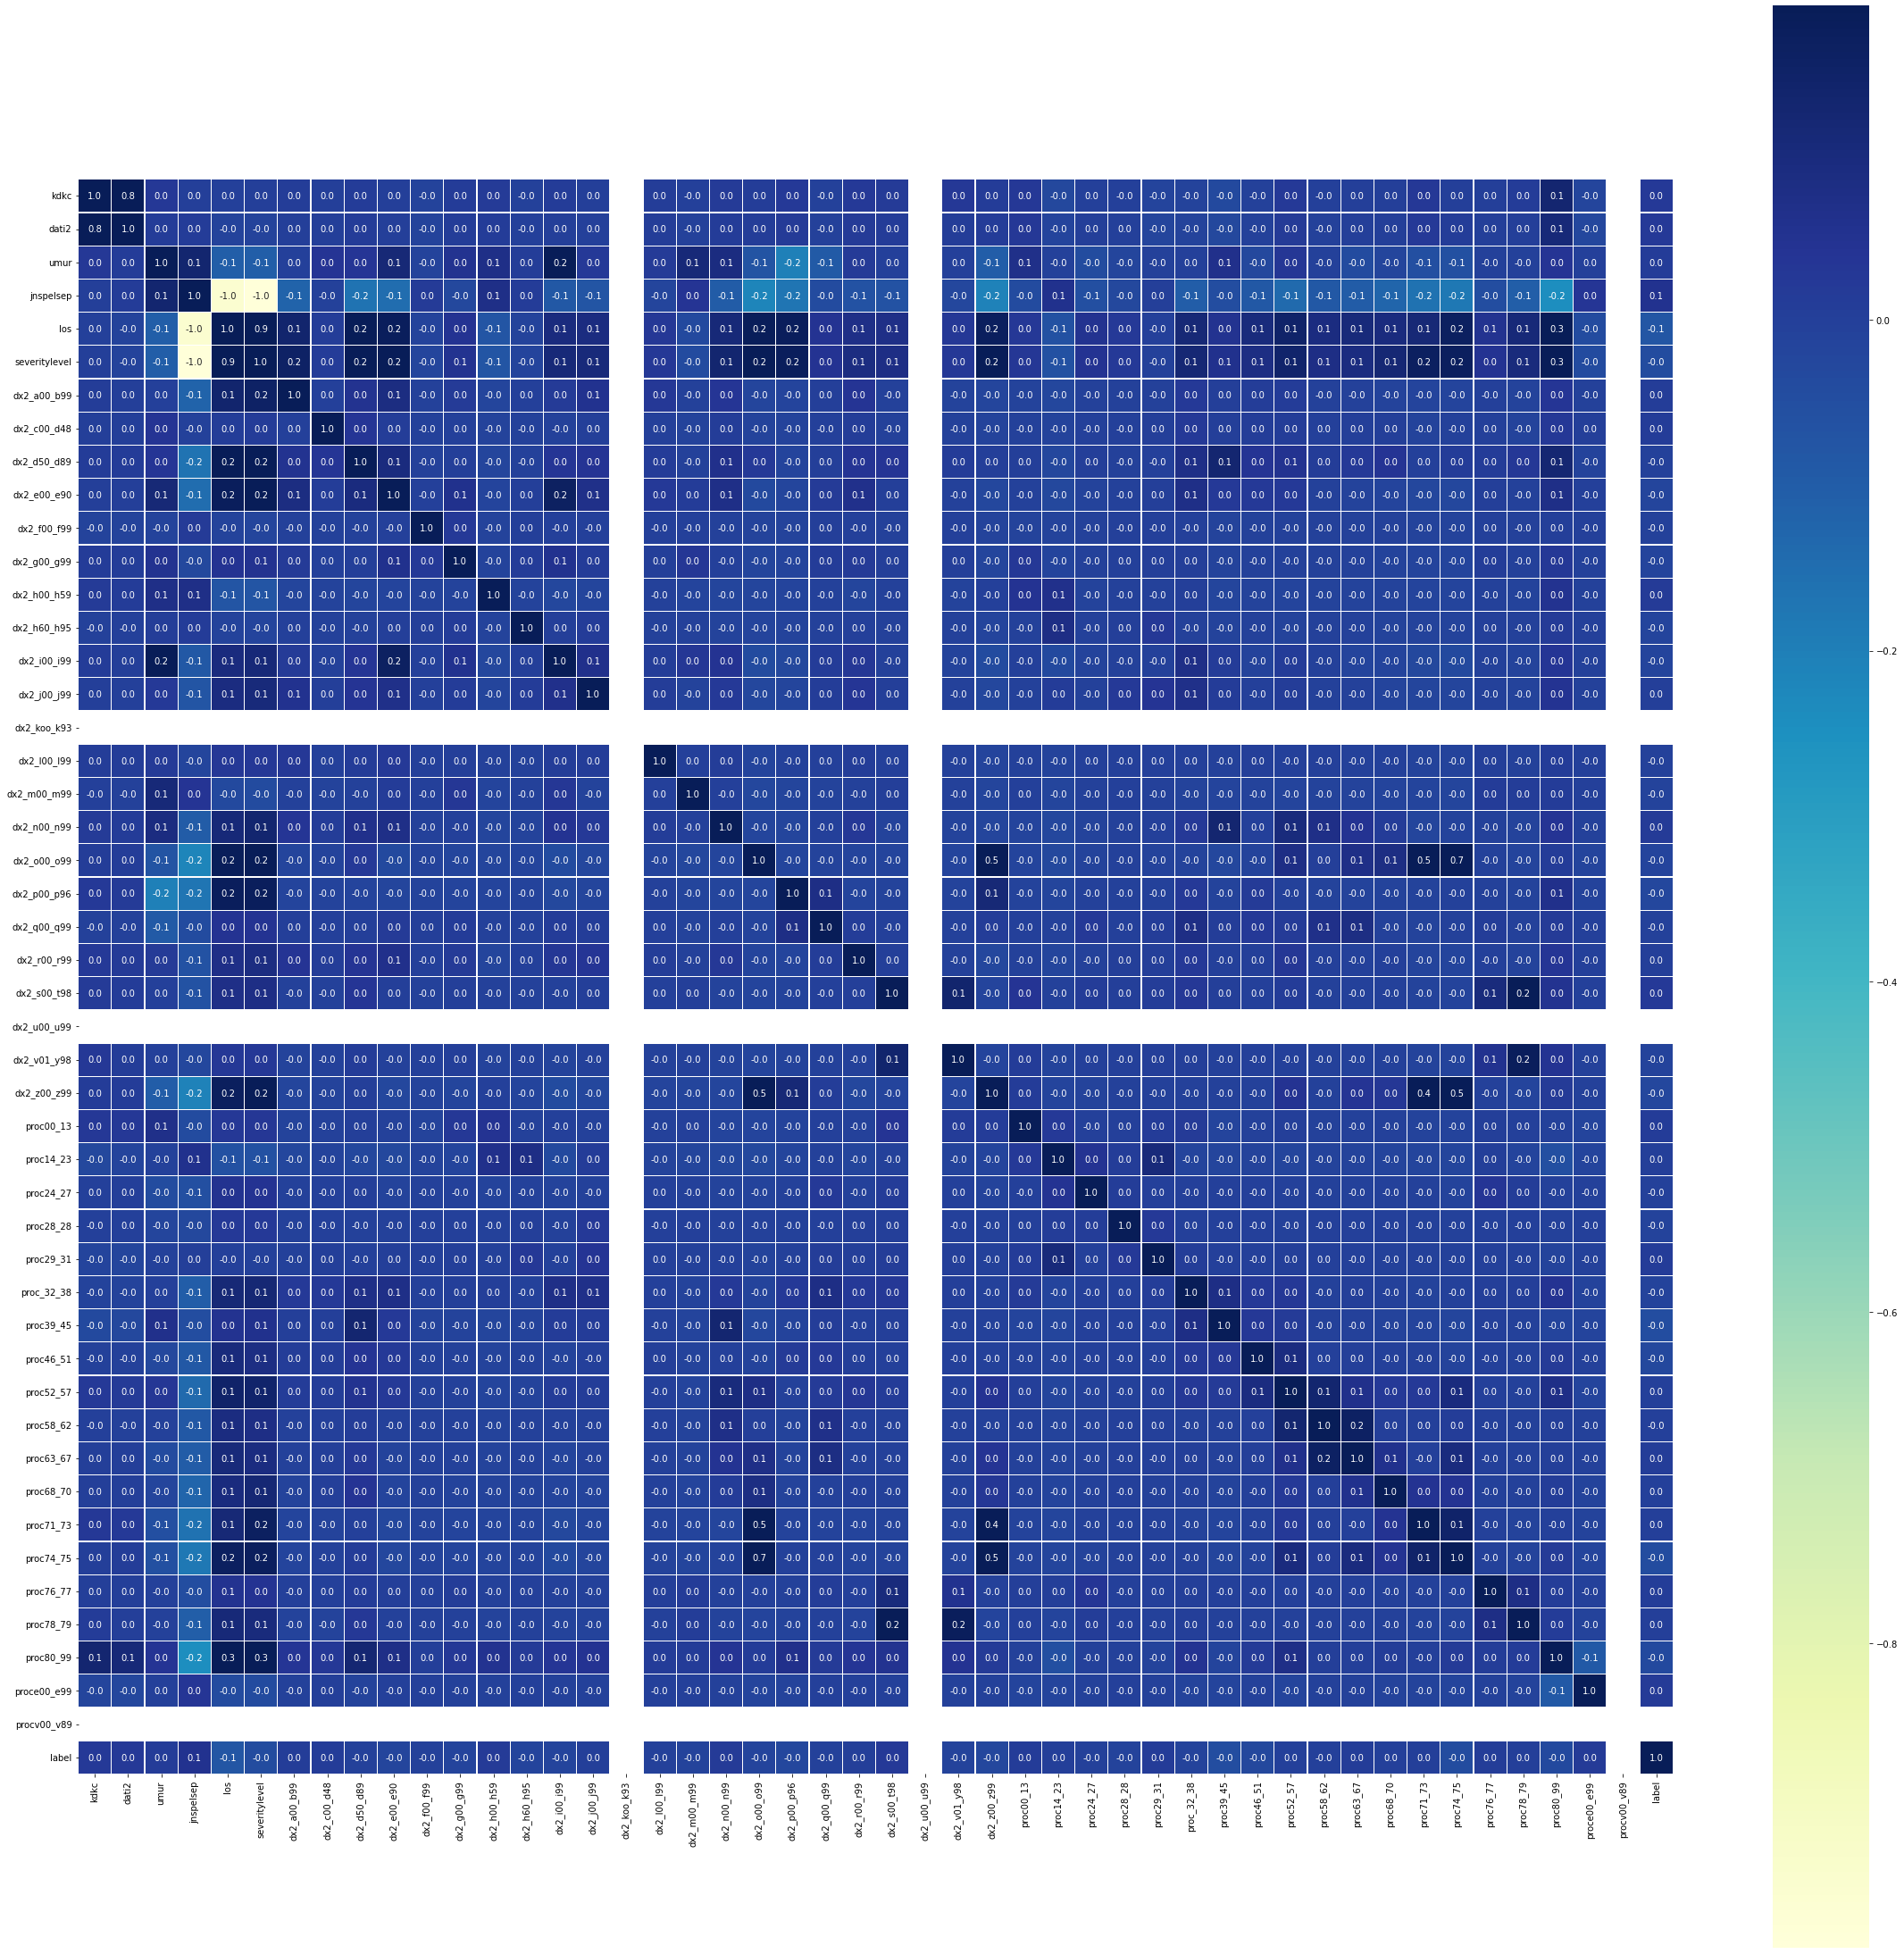

In [11]:
# melihat korelasi antar atribut pada dataset
import matplotlib
import seaborn as sns

SpearmanCorr = df.corr(method="spearman")
matplotlib.pyplot.figure(figsize=(40,40))
sns.heatmap(SpearmanCorr, vmax=.19, square=True, annot=True, linewidths=.3, cmap="YlGnBu", fmt='.1f')

Korelasi antar masing-masing atribut divisualisasikan menggunakan visualisasi heatmap. Ukuran dari visualisasi diatur menggunakan library matplotlib, dan untuk menampilkan heatmap digunakan library seaborn.

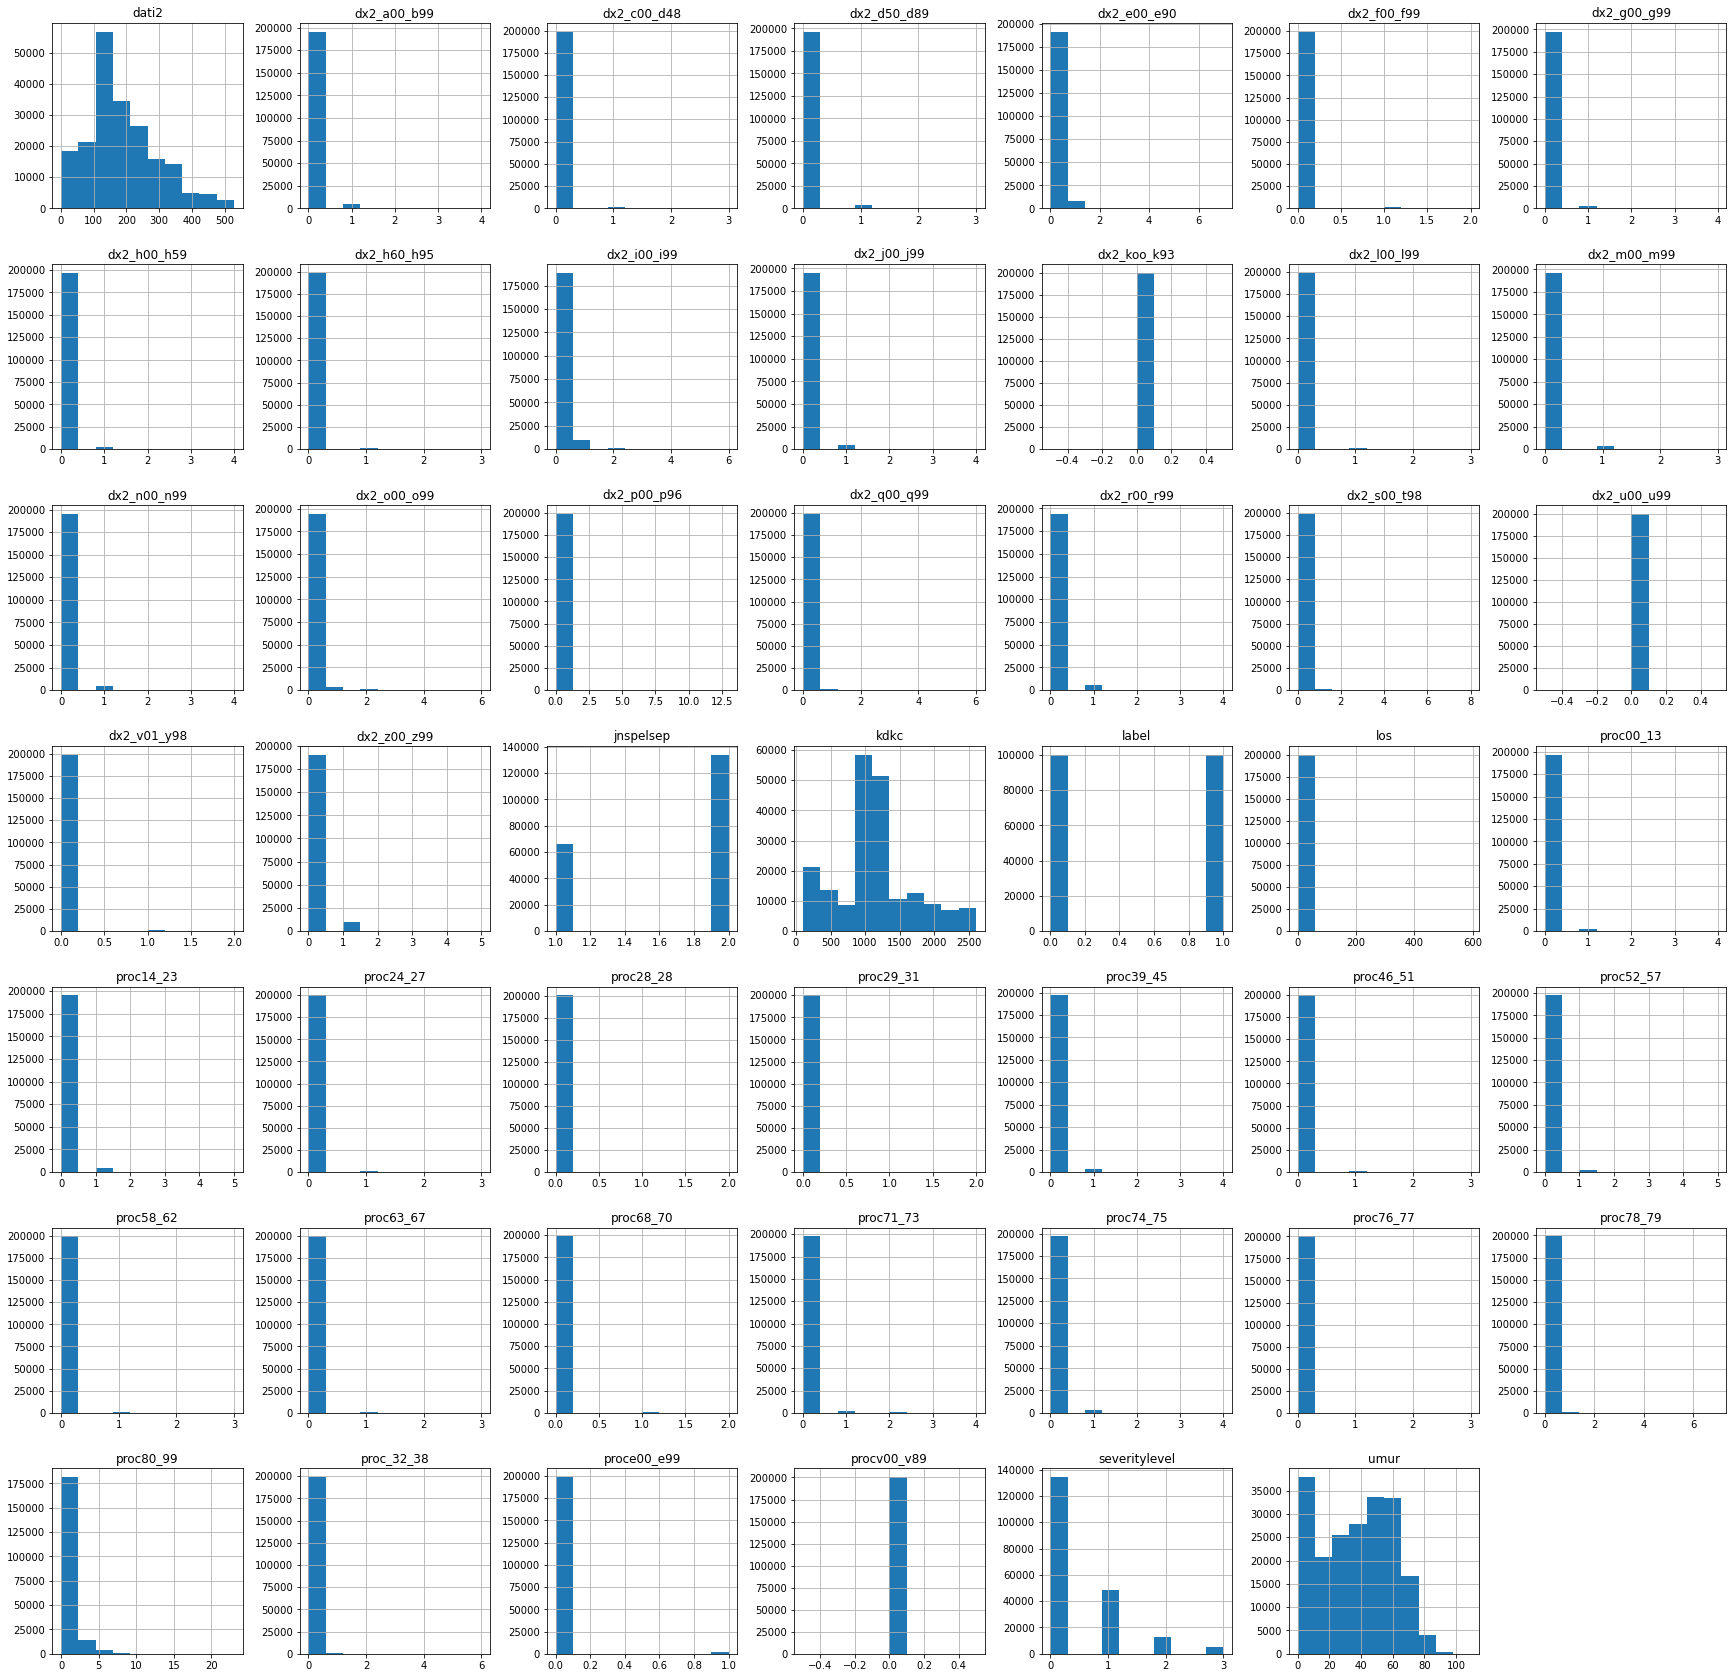

In [12]:
# menampilkan histogram untuk semua atribut
import pandas 
from pandas.plotting import scatter_matrix
import matplotlib.pyplot as plt

# menampilkan distribusi variabel dengan menggunakan plot histogram
df.hist(figsize=(30, 30))
plt.show()

Dari tampilan visualisasi, atribut yang memiliki variasi value terbanyak adalah atribut kdkc, dati2, dan umur. 
1. Atribut kdkc dengan value 1000 memiliki frekuensi tertinggi dan value 2250 memiliki frekuensi terendah.
2. Atribut dati2 dengan value 100 memiliki frekuensi tertinggi dan value 500 terendah.
3. Umur pasien dengan jumlah terbanyak adalah pasien dengan umur sekitar 0 bulan dan pasien dengan jumlah terkecil adalah pasien dengan umur 80.

## II. Data Preparation

### a. Data cleaning

#### 1. Cek Null Values

In [13]:
Missing_Percentage = (df.isnull().sum()).sum()/np.product(df.shape)*100
print("The number of missing entries before cleaning: " + str(round(Missing_Percentage,5)) + " %")

The number of missing entries before cleaning: 0.0 %


#### 2. Cek Outliers

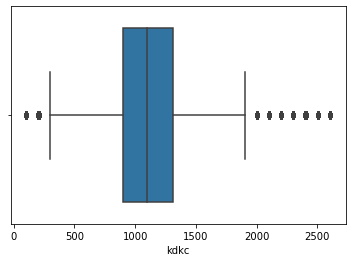

In [14]:
import seaborn as sns

sns.boxplot(x=df['kdkc'])

In [15]:
print(np.where(df['kdkc']>2000))

(array([     7,     10,     45, ..., 200190, 200204, 200212], dtype=int64),)


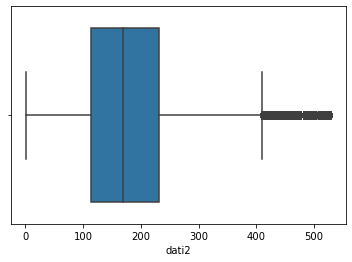

In [16]:
sns.boxplot(x=df['dati2'])

In [17]:
print(np.where(df['dati2']>400))

(array([    13,     39,     42, ..., 200122, 200147, 200196], dtype=int64),)


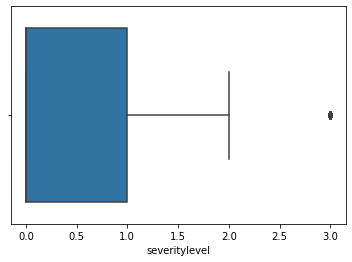

In [18]:
sns.boxplot(x=df['severitylevel'])


In [19]:
print(np.where(df['severitylevel']>1))

(array([     1,      9,     37, ..., 200177, 200197, 200205], dtype=int64),)


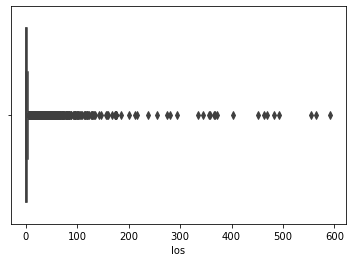

In [20]:
sns.boxplot(x=df['los'])

In [21]:
print(np.where(df['dx2_i00_i99']>1))

(array([   304,    394,    665, ..., 199868, 200011, 200175], dtype=int64),)


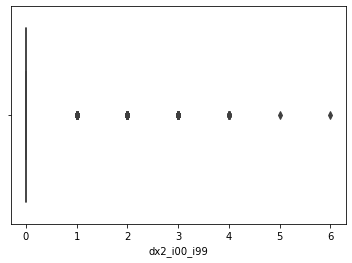

In [22]:
sns.boxplot(x=df['dx2_i00_i99'])

In [23]:
Q1 = df.quantile(0.25)
Q3 = df.quantile(0.75)
IQR = Q3 - Q1
print(IQR)

kdkc             411.0
dati2            118.0
umur              38.0
jnspelsep          1.0
los                2.0
severitylevel      1.0
dx2_a00_b99        0.0
dx2_c00_d48        0.0
dx2_d50_d89        0.0
dx2_e00_e90        0.0
dx2_f00_f99        0.0
dx2_g00_g99        0.0
dx2_h00_h59        0.0
dx2_h60_h95        0.0
dx2_i00_i99        0.0
dx2_j00_j99        0.0
dx2_koo_k93        0.0
dx2_l00_l99        0.0
dx2_m00_m99        0.0
dx2_n00_n99        0.0
dx2_o00_o99        0.0
dx2_p00_p96        0.0
dx2_q00_q99        0.0
dx2_r00_r99        0.0
dx2_s00_t98        0.0
dx2_u00_u99        0.0
dx2_v01_y98        0.0
dx2_z00_z99        0.0
proc00_13          0.0
proc14_23          0.0
proc24_27          0.0
proc28_28          0.0
proc29_31          0.0
proc_32_38         0.0
proc39_45          0.0
proc46_51          0.0
proc52_57          0.0
proc58_62          0.0
proc63_67          0.0
proc68_70          0.0
proc71_73          0.0
proc74_75          0.0
proc76_77          0.0
proc78_79  

In [24]:
def remove_outlier(col):
  sorted(col)
  Q1, Q3 = col.quantile([0.25, 0.75])
  IQR = Q3 - Q1
  lower_range = Q1 - (1.5*IQR)
  upper_range = Q3 - (1.5*IQR)
  return lower_range, upper_range

In [25]:
print(df['kdkc'].quantile(0.10))
print(df['kdkc'].quantile(0.90))

303.0
2101.0


In [26]:
df["kdkc"] = np.where(df["kdkc"] <303.0, 303.0,df['kdkc'])
df["kdkc"] = np.where(df["kdkc"] >1750.0, 1750.0,df['kdkc'])
print(df['kdkc'].skew())

-0.1903395687739066


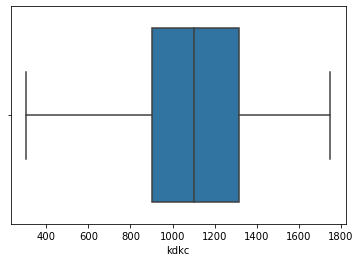

In [27]:
sns.boxplot(x=df['kdkc'])

In [28]:
print(df['dati2'].quantile(0.10))
print(df['dati2'].quantile(0.90))

56.0
342.0


In [29]:
df["dati2"] = np.where(df["dati2"] <56.0, 56.0,df['dati2'])
df["dati2"] = np.where(df["dati2"] >400.0, 400.0,df['dati2'])
print(df['dati2'].skew())

0.6736043280754417


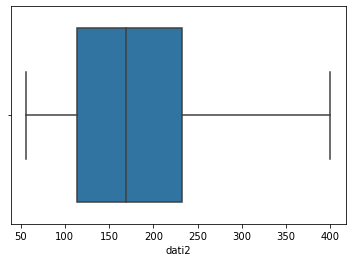

In [30]:
sns.boxplot(x=df['dati2'])

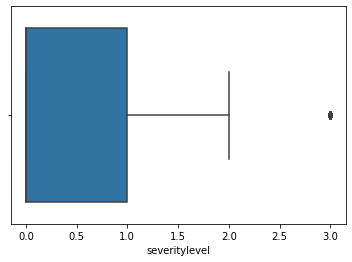

In [31]:
sns.boxplot(x=df['severitylevel'])

In [32]:
print(df['severitylevel'].quantile(0.20))
print(df['severitylevel'].quantile(0.80))

0.0
1.0


In [33]:
df["severitylevel"] = np.where(df["severitylevel"] <0.0, 0.0,df['severitylevel'])
df["severitylevel"] = np.where(df["severitylevel"] >2.0, 2.0,df['severitylevel'])
print(df['severitylevel'].skew())

1.277909056255376


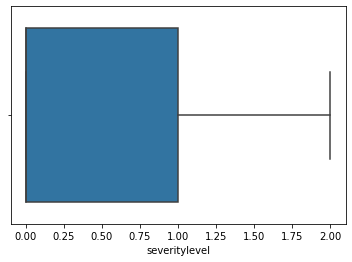

In [34]:
sns.boxplot(x=df['severitylevel'])

In [35]:
print(df['los'].quantile(0.10))
print(df['los'].quantile(0.90))

0.0
4.0


In [36]:
df["los"] = np.where(df["los"] <0.0, 0.0,df['los'])
df["los"] = np.where(df["los"] >3.0, 3.0,df['los'])
print(df['los'].skew())

1.1108259381309418


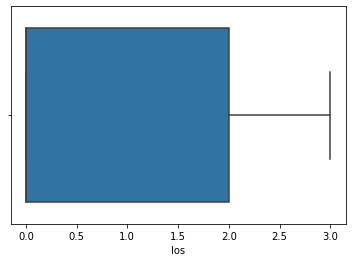

In [37]:
sns.boxplot(x=df['los'])

In [38]:
df["los"] = np.where(df["los"] >2.0, 2.0,df['los'])
print(df['los'].skew())

0.9233424366657109


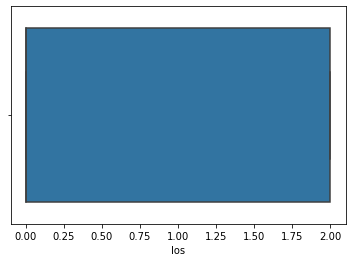

In [39]:
sns.boxplot(x=df['los'])

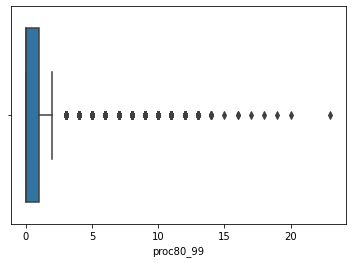

In [40]:
sns.boxplot(x=df['proc80_99'])

In [41]:
print(df['proc80_99'].quantile(0.10))
print(df['proc80_99'].quantile(0.90))

0.0
2.0


In [42]:
df["proc80_99"] = np.where(df["proc80_99"] <0.0, 0.0,df['proc80_99'])
df["proc80_99"] = np.where(df["proc80_99"] >2.0, 2.0,df['proc80_99'])
print(df['proc80_99'].skew())

0.6873545295639892


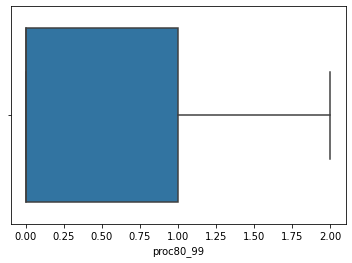

In [43]:
sns.boxplot(x=df['proc80_99'])

In [44]:
# %% New helper function ...
def remove_all_outliers(df_in, col_name):
    loop_count = 0
    outlier_count = count_outliers(df_in, col_name)

    while outlier_count > 0:
        loop_count += 1

        if (loop_count > 100):
            break

        df_in = remove_outliers(df_in, col_name)
        outlier_count = count_outliers(df_in, col_name)
    
    return df_in

In [45]:
LowKDKC, UpperKDKC = remove_outlier(df['kdkc'])

In [46]:
df['kdkc'] = np.where(df['kdkc']>UpperKDKC, UpperKDKC, df['kdkc'])
df['kdkc'] = np.where(df['kdkc']<LowKDKC, UpperKDKC, df['kdkc'])

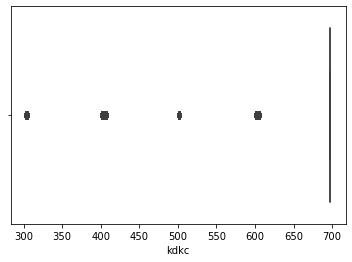

In [47]:
sns.boxplot(x=df['kdkc'])

### b. Data construction

In [48]:
C = (df.dtypes == 'object')
CategoricalVariables = list(C[C].index)

Integer = (df.dtypes == 'int64')
NumericVariables = list(Integer[Integer].index) 

In [49]:
# melakukan transformasi dari categorical menjadi numeric

data_kategori = pd.get_dummies(df[CategoricalVariables], columns=CategoricalVariables)
data_numeric = df[NumericVariables]


data_dummies= pd.get_dummies(df[CategoricalVariables], columns=CategoricalVariables)
data_numeric = df[NumericVariables]

data_numeric["id"] = data_numeric.index + 1
data_dummies["id"] = data_dummies.index + 1
data_new = pd.merge(data_numeric,data_dummies ,on="id")
response = ['Response']
VariablesNoTarget = [x for x in data_new.columns if x not in response]
print("Dummy transformation was successful")

<ipython-input-49-d30b0b3e4db6>:10: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  data_numeric["id"] = data_numeric.index + 1


Dummy transformation was successful


In [50]:
data_new.info(200)

<class 'pandas.core.frame.DataFrame'>
Int64Index: 200217 entries, 0 to 200216
Data columns (total 115 columns):
 #   Column              Dtype
---  ------              -----
 0   umur                int64
 1   jnspelsep           int64
 2   dx2_a00_b99         int64
 3   dx2_c00_d48         int64
 4   dx2_d50_d89         int64
 5   dx2_e00_e90         int64
 6   dx2_f00_f99         int64
 7   dx2_g00_g99         int64
 8   dx2_h00_h59         int64
 9   dx2_h60_h95         int64
 10  dx2_i00_i99         int64
 11  dx2_j00_j99         int64
 12  dx2_koo_k93         int64
 13  dx2_l00_l99         int64
 14  dx2_m00_m99         int64
 15  dx2_n00_n99         int64
 16  dx2_o00_o99         int64
 17  dx2_p00_p96         int64
 18  dx2_q00_q99         int64
 19  dx2_r00_r99         int64
 20  dx2_s00_t98         int64
 21  dx2_u00_u99         int64
 22  dx2_v01_y98         int64
 23  dx2_z00_z99         int64
 24  proc00_13           int64
 25  proc14_23           int64
 26  proc24_27      

In [51]:
import pandas as pd
import numpy as np
from sklearn.feature_selection import SelectKBest
from sklearn.feature_selection import chi2

X = data_new.iloc[:,0:20]  # independent columns
y = data_new.iloc[:,-1]    # target column i.e price range

# apply SelectKBest class to extract top 10 best features
bestfeatures = SelectKBest(score_func=chi2, k=10)
fit = bestfeatures.fit(X,y)
dfscores = pd.DataFrame(fit.scores_)
dfcolumns = pd.DataFrame(X.columns)

# concat two dataframes for better visualization 
featureScores = pd.concat([dfcolumns,dfscores],axis=1)
featureScores.columns = ['Specs','Score']  # naming the dataframe columns
print(featureScores.nlargest(10,'Score'))  # print 10 best features

          Specs         Score
0          umur  33699.445871
14  dx2_m00_m99  10514.373788
3   dx2_c00_d48   7225.116477
6   dx2_f00_f99   2964.027742
10  dx2_i00_i99   2952.021020
15  dx2_n00_n99   1606.055702
8   dx2_h00_h59   1372.602396
7   dx2_g00_g99   1273.761995
1     jnspelsep    654.828886
5   dx2_e00_e90    559.973747


In [52]:
data_new.head(100)

,umur,jnspelsep,dx2_a00_b99,dx2_c00_d48,dx2_d50_d89,dx2_e00_e90,dx2_f00_f99,dx2_g00_g99,dx2_h00_h59,dx2_h60_h95,...,diagprimer_l00_l99,diagprimer_m00_m99,diagprimer_n00_n99,diagprimer_o00_o99,diagprimer_p00_p96,diagprimer_q00_q99,diagprimer_r00_r99,diagprimer_s00_t98,diagprimer_u00_u85,diagprimer_z00_z99
0,64,2,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
1,45,1,1,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
2,34,2,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,1,0,0,0
3,34,2,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,1,0,0,0
4,27,2,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
95,13,2,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,1,0,0
96,5,2,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
97,41,2,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
98,29,1,0,0,0,1,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0


Dilakukan pengecekan dan penghitungan jumlah nilai null pada dataset. Melalui output dapat dilihat bahwa pada data set tidak terdapat nilai null.

## III. Modelling

In [53]:
from sklearn.model_selection import train_test_split

def data_part(X, y, split_size) :
    X_train, X_test, y_train, y_test = train_test_split(X, y,train_size)
    print(X_train.shape)
    print(X_test.shape)
    
    return X_train, X_test, y_train, y_test

In [54]:
from sklearn.model_selection import train_test_split

X_train, X_test, y_train, y_test = train_test_split(X, y, train_size = 0.8)

In [55]:
print("Banyak data latih setelah dilakuakn Train-validation Split: ", len(X_train))
print("Banyak data uji setelah dilakuakn Train-validation Split: ", len(X_test))

Banyak data latih setelah dilakuakn Train-validation Split:  160173
Banyak data uji setelah dilakuakn Train-validation Split:  40044


In [56]:
y

0         0
1         0
2         0
3         0
4         0
         ..
200212    0
200213    0
200214    0
200215    0
200216    0
Name: diagprimer_z00_z99, Length: 200217, dtype: uint8

In [57]:
X

,umur,jnspelsep,dx2_a00_b99,dx2_c00_d48,dx2_d50_d89,dx2_e00_e90,dx2_f00_f99,dx2_g00_g99,dx2_h00_h59,dx2_h60_h95,dx2_i00_i99,dx2_j00_j99,dx2_koo_k93,dx2_l00_l99,dx2_m00_m99,dx2_n00_n99,dx2_o00_o99,dx2_p00_p96,dx2_q00_q99,dx2_r00_r99
0,64,2,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0
1,45,1,1,0,0,0,0,0,0,0,1,1,0,0,0,0,0,0,0,1
2,34,2,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0
3,34,2,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0
4,27,2,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
200212,48,2,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0
200213,1,2,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0
200214,3,2,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0
200215,52,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0


In [58]:
from sklearn.neighbors import KNeighborsClassifier
from sklearn import metrics

knn = KNeighborsClassifier()

knn.fit(X_train, y_train)
y_pred = knn.predict(X_test)
score = metrics.accuracy_score(y_test, y_pred)
print("Akurasi dengan menggunakan Nearest Neighbor: ", score)

Akurasi dengan menggunakan Nearest Neighbor:  0.9495305164319249


In [64]:
neighbours = np.arange(1,25)
train_accuracy =np.empty(len(neighbours))
test_accuracy = np.empty(len(neighbours))

for i,k in enumerate(neighbours):
    # setup a knn classifier with k neighbors
    knn=KNeighborsClassifier(n_neighbors=k,algorithm="kd_tree",n_jobs=-1)
    
    # fit the model
    knn.fit(X_train,y_train.ravel())
    
    # compute accuracy on the training set
    train_accuracy[i] = knn.score(X_train, y_train.ravel())
    
    # compute accuracy on the test set
    test_accuracy[i] = knn.score(X_test, y_test.ravel()) 

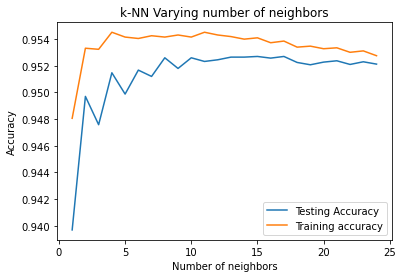

In [65]:
# generate plot
plt.title('k-NN Varying number of neighbors')
plt.plot(neighbours, test_accuracy, label='Testing Accuracy')
plt.plot(neighbours, train_accuracy, label='Training accuracy')
plt.legend()
plt.xlabel('Number of neighbors')
plt.ylabel('Accuracy')
plt.show()

In [66]:
idx = np.where(test_accuracy == max(test_accuracy))
x = neighbours[idx]

In [67]:
# k_nearest_neighbours_classification
knn=KNeighborsClassifier(n_neighbors=x[0],algorithm="kd_tree",n_jobs=-1)
knn.fit(X_train,y_train.ravel())

KNeighborsClassifier(algorithm='kd_tree', n_jobs=-1, n_neighbors=15)